<a href="https://colab.research.google.com/github/shriju/ANN/blob/main/ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd

In [29]:
df= pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
df.shape

(500, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [32]:
df.duplicated().sum()

0

In [33]:
df.drop(columns=['Serial No.'], inplace = True)

In [34]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
X= df.iloc[:, 0:-1]
y=df.iloc[:,-1]

In [36]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [38]:
X_train.shape

(400, 7)

In [39]:
X_test.shape

(100, 7)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [41]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [42]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [43]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation='linear'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss = 'mean_squared_error', optimizer ='Adam')


In [46]:
history = model.fit(X_train_scaled, y_train, epochs =100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.0993 - val_loss: 0.0767
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0588 - val_loss: 0.0570
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0487 - val_loss: 0.0544
Epoch 4/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0448 - val_loss: 0.0484
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0394 - val_loss: 0.0429
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0354 - val_loss: 0.0390
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0320 - val_loss: 0.0359
Epoch 8/100
10/10 [==============================] - 0s 28ms/step - loss: 0.0293 - val_loss: 0.0331
Epoch 9/100
10/10 [==============================] - 0s 29ms/step - loss: 0.0270 - val_loss: 0.0310
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 0.0291
E

In [47]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7892992094405211

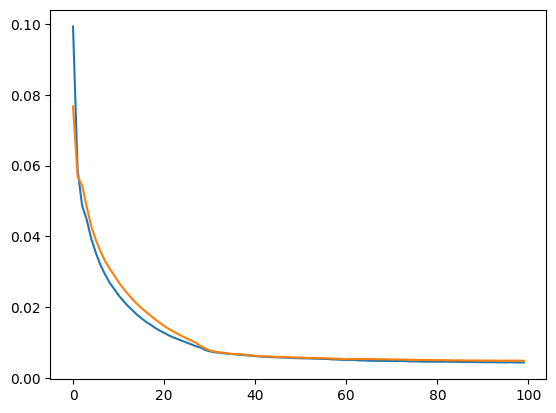

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])